In [1]:
import os
import pandas as pd

def read_data(file_path):
    # Open the file
    with open(file_path, 'r') as file:  # Use 'with' for automatic file closure

        # Split the text data into lines and remove extra whitespace
        lines = [line.strip() for line in file if line.strip()] 

        # Create a list to store data rows
        data = []

        # Process each line
        for line in lines:
            # Split the values in the line based on multiple spaces
            values = line.split()  
            
            # Convert values to floats
            values = [abs(float(val)) for val in values]

            # Add the row to the data list
            data.append(values)

    # Create a Pandas DataFrame
    column_names = [
        'absolute angle of inclination', 'angle of inclination', 'number of electrodes',
        'voltage magnitude', 'voltage frequency', 'electrode dimension',
        'x pitch', 'number of phases', 'grain mass density',
        'mesh size', 'gravity', 'phase shift', 'time step',
        'maximum classified radius', 'distance between dust generation and first electrode',
        'grain number density', 'yield'
    ]

    df = pd.DataFrame(data, columns=column_names)

    return df

def read_dataset_folder(folder_path):
    # Get a list of all files in the folder
    file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')] 

    # Create an empty list to store DataFrames
    all_dataframes = []

    # Read each file and append its DataFrame to the list
    for file_name in file_list:
        file_path = os.path.join(folder_path, file_name)
        df = read_data(file_path)
        all_dataframes.append(df)

    # Concatenate all DataFrames into a single DataFrame
    concatenated_df = pd.concat(all_dataframes, ignore_index=True)

    concatenated_df = concatenated_df.fillna(concatenated_df.mean())

    return concatenated_df

In [2]:
Folder_name = "Dataset"
data = read_dataset_folder(Folder_name)
data

,absolute angle of inclination,angle of inclination,number of electrodes,voltage magnitude,voltage frequency,electrode dimension,x pitch,number of phases,grain mass density,mesh size,gravity,phase shift,time step,maximum classified radius,distance between dust generation and first electrode,grain number density,yield
0,335.0,25.0,4.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.014511,1.0,3.738749
1,335.0,25.0,6.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.015185,1.0,2.602313
2,335.0,25.0,8.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.015858,1.0,2.719417
3,335.0,25.0,10.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.016532,1.0,1.865867
4,335.0,25.0,4.0,500.0,5.0,4.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.014011,1.0,6.512353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14906,25.0,25.0,8.0,2000.0,20.0,3.0,20.0,4.0,4000.0,0.001,3.0,90.0,0.005,0.00001,0.065283,1.0,0.605576
14907,310.0,50.0,4.0,2000.0,20.0,6.0,40.0,4.0,3000.0,0.001,3.0,90.0,0.005,0.00001,0.035495,1.0,19.856253
14908,310.0,50.0,6.0,2000.0,20.0,6.0,40.0,4.0,3000.0,0.001,3.0,90.0,0.005,0.00001,0.032825,1.0,16.188948
14909,50.0,50.0,4.0,2000.0,20.0,6.0,40.0,4.0,3000.0,0.001,3.0,90.0,0.005,0.00001,0.143010,1.0,5.728012


In [3]:
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14911 entries, 0 to 14910
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   absolute angle of inclination                         14911 non-null  float64
 1   angle of inclination                                  14911 non-null  float64
 2   number of electrodes                                  14911 non-null  float64
 3   voltage magnitude                                     14911 non-null  float64
 4   voltage frequency                                     14911 non-null  float64
 5   electrode dimension                                   14911 non-null  float64
 6   x pitch                                               14911 non-null  float64
 7   number of phases                                      14911 non-null  float64
 8   grain mass density                                    14

,absolute angle of inclination,angle of inclination,number of electrodes,voltage magnitude,voltage frequency,electrode dimension,x pitch,number of phases,grain mass density,mesh size,gravity,phase shift,time step,maximum classified radius,distance between dust generation and first electrode,grain number density,yield
count,14911.000000,14911.000000,14911.000000,14911.000000,14911.000000,14911.000000,14911.000000,14911.0,14911.000000,14911.000,14911.000000,14911.0,1.491100e+04,14911.00000,14911.000000,14911.0,14911.000000
mean,169.552679,37.113540,6.875327,1233.787137,12.341560,4.830528,25.168667,4.0,2452.045607,0.001,6.762575,90.0,5.000000e-03,0.00001,0.075496,1.0,9.135689
std,143.055468,12.494444,2.235006,554.901218,5.575946,0.899912,7.002207,0.0,1141.298771,0.000,3.408471,0.0,8.673908e-19,0.00000,0.079465,0.0,12.565994
min,25.000000,25.000000,4.000000,500.000000,5.000000,3.000000,20.000000,4.0,1000.000000,0.001,3.000000,90.0,5.000000e-03,0.00001,0.000000,1.0,0.000000
25%,25.000000,25.000000,4.000000,500.000000,5.000000,4.000000,20.000000,4.0,1000.000000,0.001,3.000000,90.0,5.000000e-03,0.00001,0.020242,1.0,0.055486
50%,50.000000,25.000000,6.000000,1000.000000,10.000000,5.000000,20.000000,4.0,2000.000000,0.001,6.000000,90.0,5.000000e-03,0.00001,0.033222,1.0,1.303962
75%,310.000000,50.000000,8.000000,1500.000000,15.000000,6.000000,30.000000,4.0,3000.000000,0.001,9.000000,90.0,5.000000e-03,0.00001,0.114245,1.0,19.292713
max,335.000000,50.000000,10.000000,2000.000000,20.000000,6.000000,40.000000,4.0,4000.000000,0.001,12.000000,90.0,5.000000e-03,0.00001,0.429031,1.0,63.634754


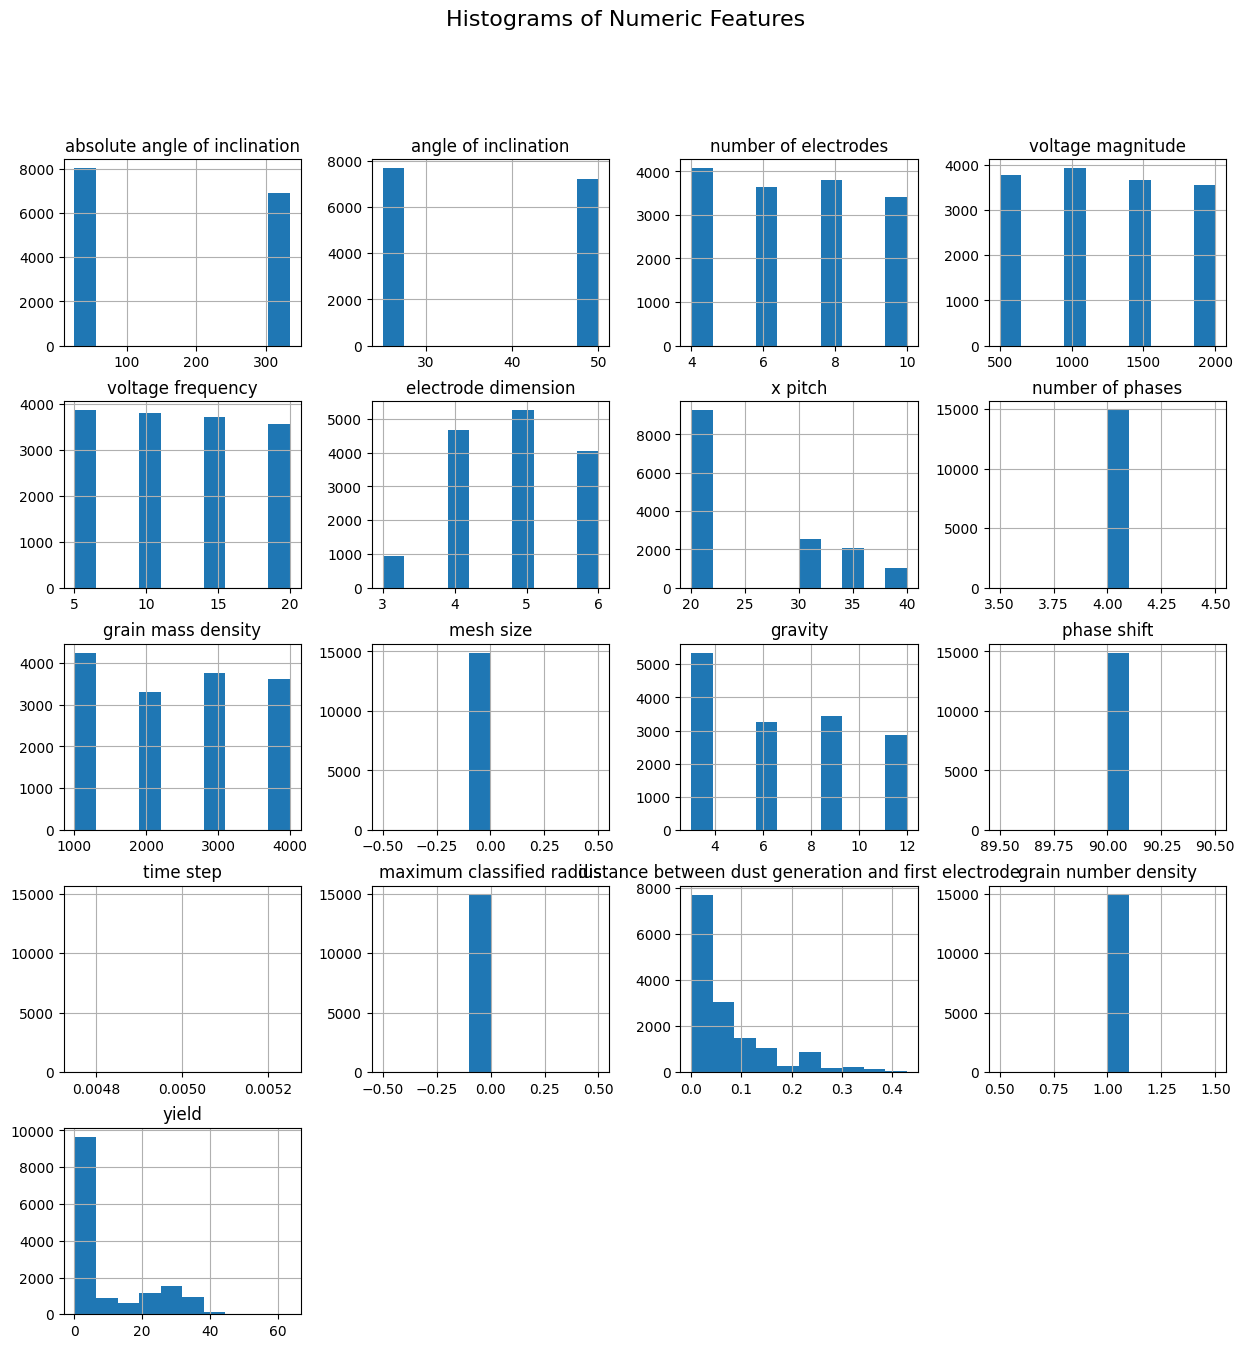

In [4]:
import matplotlib.pyplot as plt

numeric_features = data.select_dtypes(include=['float64'])
numeric_features.hist(figsize=(15, 15))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [5]:
drop_features = ['number of phases','mesh size',
                 'phase shift','time step', 'maximum classified radius','grain number density', 'angle of inclination']
target = 'yield'
data = data.drop(columns= drop_features)
data

,absolute angle of inclination,number of electrodes,voltage magnitude,voltage frequency,electrode dimension,x pitch,grain mass density,gravity,distance between dust generation and first electrode,yield
0,335.0,4.0,500.0,5.0,3.0,20.0,1000.0,3.0,0.014511,3.738749
1,335.0,6.0,500.0,5.0,3.0,20.0,1000.0,3.0,0.015185,2.602313
2,335.0,8.0,500.0,5.0,3.0,20.0,1000.0,3.0,0.015858,2.719417
3,335.0,10.0,500.0,5.0,3.0,20.0,1000.0,3.0,0.016532,1.865867
4,335.0,4.0,500.0,5.0,4.0,20.0,1000.0,3.0,0.014011,6.512353
...,...,...,...,...,...,...,...,...,...,...
14906,25.0,8.0,2000.0,20.0,3.0,20.0,4000.0,3.0,0.065283,0.605576
14907,310.0,4.0,2000.0,20.0,6.0,40.0,3000.0,3.0,0.035495,19.856253
14908,310.0,6.0,2000.0,20.0,6.0,40.0,3000.0,3.0,0.032825,16.188948
14909,50.0,4.0,2000.0,20.0,6.0,40.0,3000.0,3.0,0.143010,5.728012


In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import numpy as np
X = data.drop(target, axis=1)  # Features (independent variables)
y = data[target]                # Target (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [8]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3]  # Only used for 'poly' kernel
}

In [9]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [10]:
#Define SVR model
svr = SVR()

In [11]:
grid_search = GridSearchCV(svr, param_grid=param_grid, cv=5, scoring=make_scorer(rmse, greater_is_better=False),return_train_score=True )
grid_search.fit(X_train, y_train)

#get best parameter
cv_results = grid_search.cv_results_
best_index = grid_search.best_index_

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
results_dict = {
            'fit_time': np.mean(cv_results['mean_fit_time'][best_index]),
            'score_time': np.mean(cv_results['mean_score_time'][best_index]),
            'train_score': -cv_results['mean_train_score'][best_index],  # Convert to positive
            'test_score': -cv_results['mean_test_score'][best_index],     # Convert to positive
            'best_params': grid_search.best_params_
}


Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


In [12]:
# Display the results
print(results_dict)

{'fit_time': 5.831542444229126, 'score_time': 0.6341150283813477, 'train_score': 3.606714423854831, 'test_score': 3.7158288460803988, 'best_params': {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}}


In [13]:
#Extract best model
best_model = grid_search.best_estimator_

In [14]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [15]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = rmse(y_test, y_pred)

In [16]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("RMSE:", rmse)

Mean Squared Error: 14.638917251868877
R-squared: 0.9106167833155705
RMSE: 3.826083800946978


In [17]:
# input the new random test data
new_test_data = np.array([[250.0, 4.0, 1000.0, 10.0, 3.0, 25.0, 2650.0, 9.81, 0.0081]])
#transform it
new_test_data= sc.transform(new_test_data)
#Make the yield prediction
new_pred = best_model.predict(new_test_data)

#print the predicted yield
print("Predicted yield: ", new_pred )

Predicted yield:  [4.38647558]


/home/da0698@unt.ad.unt.edu/anaconda3/envs/dlgpu/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
